In [1]:
#Assignment 8

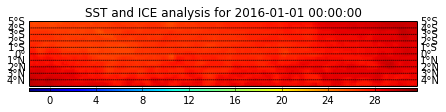

In [11]:
#2a) 
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-90,llcrnrlat=5,urcrnrlon=-150,urcrnrlat=-5,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

In [14]:
import numpy as np
from astropy import constants as cn
from astropy import units as un
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.integrate import odeint
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy import optimize
from scipy import stats
from scipy import integrate

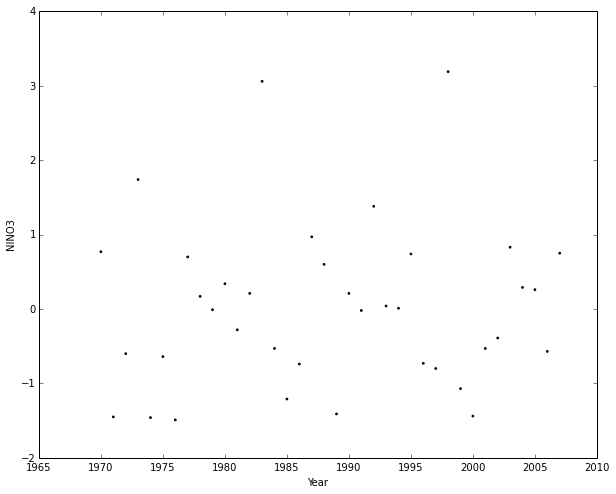

In [21]:
#2b)
yearDat = np.loadtxt('crap.dat', usecols=[0])
tempDat = np.loadtxt('crap.dat', usecols=[1])
precDat = np.loadtxt('crap.dat', usecols=[2])
snowDat = np.loadtxt('crap.dat', usecols=[3])
NINO3Dat = np.loadtxt('crap.dat', usecols=[4])
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, NINO3Dat, s=3)
plt.xlabel("Year")
plt.ylabel("NINO3")

In [ ]:
#2c) The five largest events happened in 1998, 1983, 1973, 1992, 1987

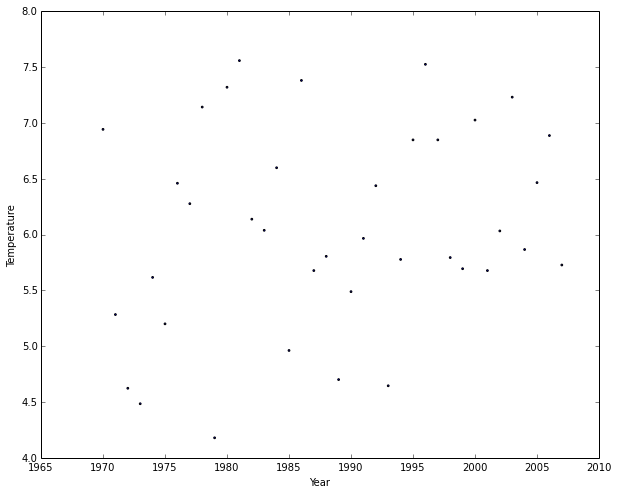

In [22]:
#2d) 
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, tempDat, s=3)
plt.xlabel("Year")
plt.ylabel("Temperature")

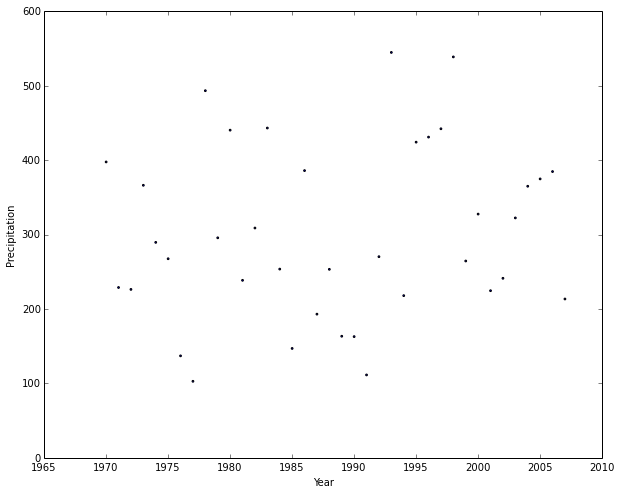

In [25]:
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, precDat, s=3)
plt.xlabel("Year")
plt.ylabel("Precipitation")

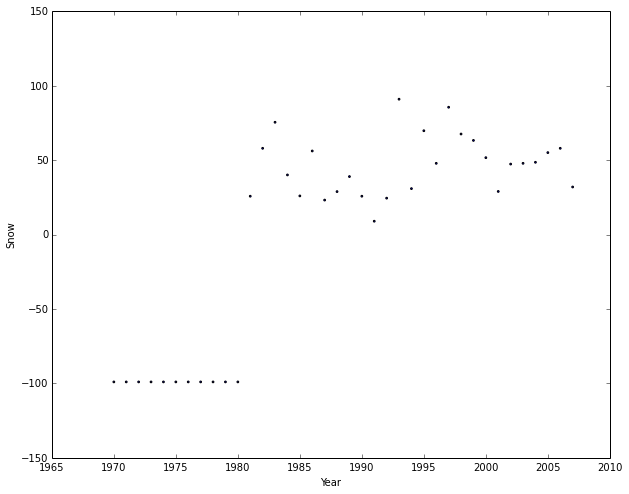

In [27]:
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, snowDat, s=3)
plt.xlabel("Year")
plt.ylabel("Snow")

In [28]:
#2d) There is some similarities but they are not exactly the same

In [ ]:
#2e)
